In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
from sklearn.naive_bayes import GaussianNB
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
data=pd.read_csv("SMSSpamCollection",sep="\t",header=None)
data.columns=["type","sms"]
data.head()

,type,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


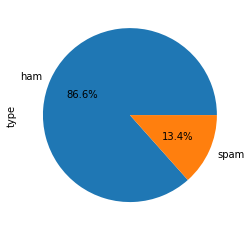

In [3]:
data["type"].value_counts().plot.pie(autopct="%1.1f%%")

In [4]:
ps=PorterStemmer()
corpus=[]
for i in data['sms']:
    s=re.sub('[^a-zA-Z]',' ',i).lower().split()
    s=[ps.stem(word) for word in s if word not in stopwords.words('english')]
    corpus.append(" ".join(s))

In [5]:
corpus[0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [6]:
len(corpus)

5572

In [7]:
cv=CountVectorizer(max_features=5000)

In [8]:
x=cv.fit_transform(corpus).toarray()

In [9]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
data['type']=en.fit_transform(data['type'])
y=data.iloc[:,0]

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [11]:
nb=GaussianNB()

In [12]:
nb.fit(xtrain,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [13]:
nb.score(xtest,ytest)

0.8642344497607656

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)

/home/ubu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
rf.score(xtrain,ytrain)

0.9971794871794872

In [15]:
rf.score(xtest,ytest)

0.972488038277512

In [16]:
y_pred=rf.predict(xtest)

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,y_pred)

array([[1447,    4],
       [  42,  179]])